### Big data processing
Let's delve into the realm of processing ridiculously large files. 

The problem of doing this is as follows: you have a file that doesn't fit into your computer's memory, and need to do operations on it. For example, your file has two columns, and you need to compute their sum. This means that you need to create _another_ column, which makes the problem even harder. This is a faily standard problem in scientific computing/big data processing, and there are many ways of solving it.

The easy solution is to chunk your file, and only read a subset of it at any given time. This is obviosuly inconvenient, and breaks the advantage of, say, having one pandas dataframe or similar structure where you do all your processing. 

The smart solution relies on the principle of reading memory-mapped files: a binary file that you keep on disk and can access small portions at any given time.

If all you need is a stupidly large array, this is very easy to do with numpy:
(this is straight out of the numpy documentation, by the way https://numpy.org/doc/stable/reference/generated/numpy.memmap.html)

In [ ]:
data = np.arange(12, dtype='float32')
data.resize((3,4))


In [ ]:
filename = 'memmap.dat'
fp = np.memmap(filename, dtype='float32', mode='w+', shape=(3,4))
fp

In [ ]:
fp[:] = data[:]

In [ ]:
del fp #delete it, let's see if the data was saved

In [ ]:
newfp = np.memmap(filename, dtype='float32', mode='r', shape=(3,4))
newfp

You can work with this `memmap` array the same way you would with a numpy array, no surprises here. 

Let's now work with more complex data structures. Usually, one would do this with a package like astropy tables or pandas, and neither has memory-mapping capabilities. For image FITS files, one can use astropy.io.fits to do memmapping, but this doesn't work well for table-like files.

We'll be using a file type called HDF5 from now on. See http://docs.h5py.org/en/stable/ for details.

Warning: HDF5 files are uncompressed, which means they're HUGE. Don't try to do this without decent free storage space (you might need hundreds of GB!). 

Since this is a rather common problem, there are many solutions to it. We'll be using one of them, called `vaex`. I recommend reading their paper: https://www.aanda.org/10.1051/0004-6361/201732493 (or http://arxiv.org/abs/1801.02638)

I'll be using a version of Gaia DR2 release - positions and velocities of a huge number of stars in the Milky Way. The example file provided by `vaex` is rather small, but gets the point across

In [1]:
import vaex

In [2]:
tgas = vaex.datasets.tgas.fetch()
# the file is downloaded to ~/.vaex/data
# if we wanted to open it afterwards, we'd do
# tgas = vaex.open(path_to_file)

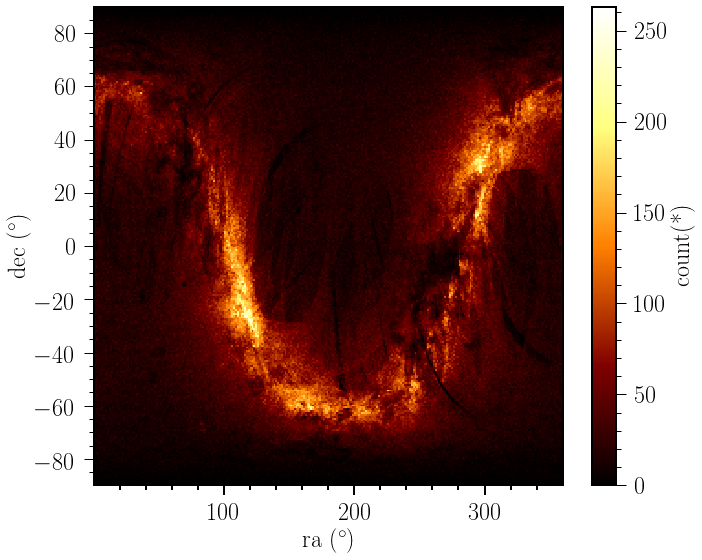

In [6]:
tgas.plot(tgas.ra, tgas.dec)
pl.show()

Let's compute the absolute value of the velocity of the stars in this dataset. This is given by `absvel = sqrt(pmra^2 + pmdec^2)`:

In [8]:
tgas['absvel'] = np.sqrt(tgas['pmra']**2 + tgas['pmdec']**2)

See how this is instantaneous? This is because vaex uses "virtual columns", meaning that the idea that you'll compute something is saved, and the results are only really computed when you need them. This, obviously, uses less memory than computing things.

If we try to access the max, for example  we can just do:

In [14]:
tgas.max('absvel')

array(3454.94938012)

Note how the usage is very similar to Pandas and Astropy Tables: this is by design, and you can convert one from another.

This notebook represents just the basics of how you can process imensely large datasets, read the documentation for more details!

In [15]:
tgas[tgas['absvel'] == tgas.max('absvel')]

#,astrometric_delta_q,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_n_bad_obs_ac,astrometric_n_bad_obs_al,astrometric_n_good_obs_ac,astrometric_n_good_obs_al,astrometric_n_obs_ac,astrometric_n_obs_al,astrometric_primary_flag,astrometric_priors_used,astrometric_relegation_factor,astrometric_weight_ac,astrometric_weight_al,b,dec,dec_error,dec_parallax_corr,dec_pmdec_corr,dec_pmra_corr,duplicated_source,ecl_lat,ecl_lon,hip,l,matched_observations,parallax,parallax_error,parallax_pmdec_corr,parallax_pmra_corr,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_g_n_obs,phot_variable_flag,pmdec,pmdec_error,pmra,pmra_error,pmra_pmdec_corr,ra,ra_dec_corr,ra_error,ra_parallax_corr,ra_pmdec_corr,ra_pmra_corr,random_index,ref_epoch,scan_direction_mean_k1,scan_direction_mean_k2,scan_direction_mean_k3,scan_direction_mean_k4,scan_direction_strength_k1,scan_direction_strength_k2,scan_direction_strength_k3,scan_direction_strength_k4,solution_id,source_id,tycho2_id,absvel
0,4.85056,0.996589,680.873,2,0,164,166,166,166,84,3,9.71062,2.97476e-05,0.994036,-44.2431,-38.8721,0.3704,-0.604159,0.346994,0.353648,70,-21.9523,309.52,105090,3.89696,24,251.138,0.568683,-0.200746,-0.227215,7.20083e+07,65635.4,5.88131,172,b'NOT_AVAILABLE',-1145.98,0.0374664,-3259.36,0.0477685,0.23872,319.296,0.877965,0.368213,-0.460823,0.328909,0.358762,1.85706e+06,2015,-51.3776,-41.8592,-45.0618,-43.2016,0.516615,0.849948,0.563102,0.707152,1.63538e+18,6.58327e+18,b'',3454.95
